In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../Datasets/nifty50_1year.csv")
# df

In [39]:
# df.describe()
# df.info()

## 1 Closing Price with 7-day & 30-day Moving Average

In [40]:
pd.to_datetime(df["Date "], format="%d-%b-%Y")
df["MA7"] = df["Close "].rolling(window=7).mean()
df["MA30"] = df["Close "].rolling(window=30).mean()
# df.tail(8)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             251 non-null    object 
 1   Open             251 non-null    float64
 2   High             251 non-null    float64
 3   Low              251 non-null    float64
 4   Close            251 non-null    float64
 5   Shares Traded    250 non-null    float64
 6   Turnover (₹ Cr)  250 non-null    float64
 7   MA7              245 non-null    float64
 8   MA30             222 non-null    float64
dtypes: float64(8), object(1)
memory usage: 17.8+ KB


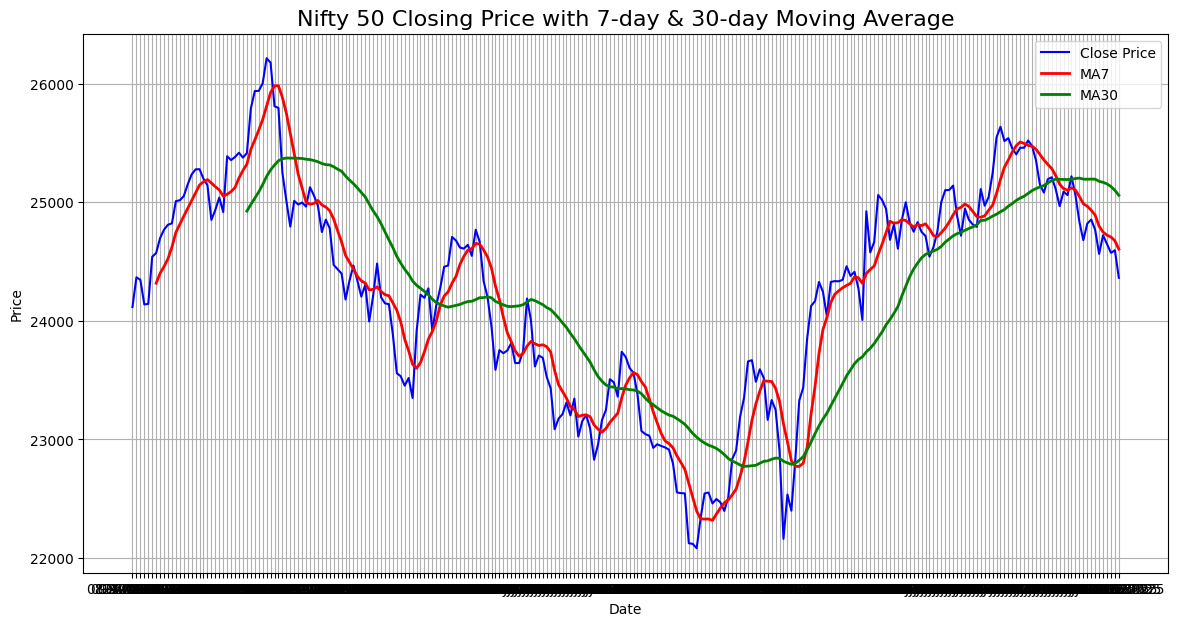

In [41]:
plt.figure(figsize=(14, 7))

# plt.style.use("dark_background")

plt.plot(df["Date "], df["Close "], label="Close Price", color="blue", linewidth=1.5)
plt.plot(df["Date "], df["MA7"], color="red", label="MA7", linewidth=2)
plt.plot(df["Date "], df["MA30"], color="green", label="MA30", linewidth=2)
# # Labels & Title
plt.title("Nifty 50 Closing Price with 7-day & 30-day Moving Average", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()  # above box showing line %colors
plt.grid(True)
plt.show()

## Create a candlestick chart for the last 3 months to visualize daily open, high, low, and close prices.

/tmp/ipykernel_71375/3924717474.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df["Date "]).between(


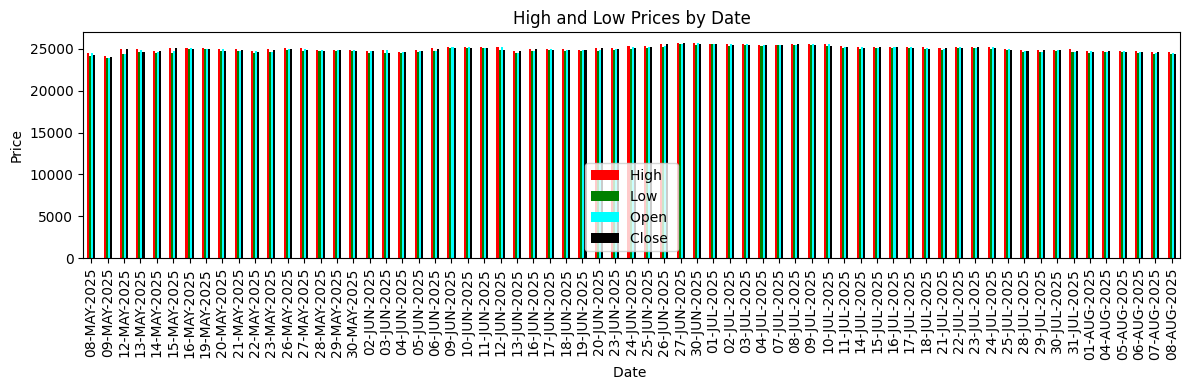

In [42]:
# three_month_data = df[['Date ', 'High ', 'Low ', 'Open ', 'Close ']].apply(lambda x : x in )

three_month_data = df[
    pd.to_datetime(df["Date "]).between(
        pd.to_datetime("8-MAY-2025"), pd.to_datetime("8-AUG-2025")
    )
][["Date ", "High ", "Low ", "Open ", "Close "]]
three_month_data

three_month_data.plot(
    x="Date ",  # Your date column (with space)
    y=["High ", "Low ", "Open ", "Close "],  # Columns to plot
    color=["red", "green", "aqua", "black"],
    kind="bar",
    figsize=(12, 4),
    title="High and Low Prices by Date",
)
plt.ylabel("Price")
# plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Plot Shares Traded vs. Closing Price to see if price surges align with volume spikes.

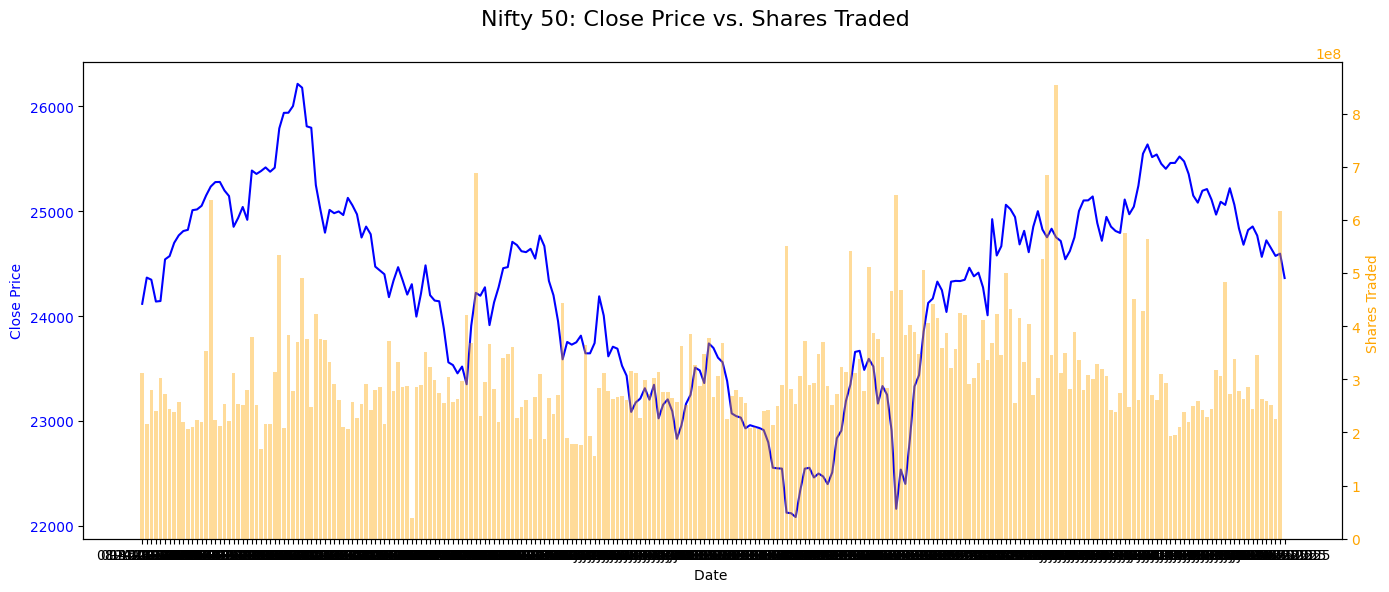

In [50]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Closing Price (left axis)
ax1.set_xlabel('Date ')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(df['Date '], df['Close '], color='blue', label='Close Price', linewidth=1.5)
ax1.tick_params(axis='y', labelcolor='blue')

# Create right axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Shares Traded ', color='orange')
ax2.bar(df['Date '], df['Shares Traded '], color='orange', alpha=0.4, label='Shares Traded')
ax2.tick_params(axis='y', labelcolor='orange')

# Title & layout
fig.suptitle('Nifty 50: Close Price vs. Shares Traded', fontsize=16)
fig.tight_layout()
plt.show()


In [48]:
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),MA7,MA30
0,08-AUG-2024,24248.55,24340.50,24079.70,24117.00,311875940.0,30858.18,NaN,NaN
1,09-AUG-2024,24386.85,24419.75,24311.20,24367.50,215129992.0,22339.19,NaN,NaN
2,12-AUG-2024,24320.05,24472.80,24212.10,24347.00,279925100.0,30311.85,NaN,NaN
3,13-AUG-2024,24342.35,24359.95,24116.50,24139.00,239727640.0,25459.58,NaN,NaN
4,14-AUG-2024,24184.40,24196.50,24099.70,24143.75,303254705.0,27834.61,NaN,NaN
...,...,...,...,...,...,...,...,...,...
246,04-AUG-2025,24596.05,24736.25,24554.00,24722.75,259329477.0,20372.68,24750.071429,25169.118333
247,05-AUG-2025,24720.25,24733.10,24590.30,24649.55,251849778.0,23815.36,24723.292857,25155.958333
248,06-AUG-2025,24641.35,24671.40,24539.20,24574.20,225091071.0,20559.22,24708.050000,25133.606667
249,07-AUG-2025,24464.20,24634.20,24344.15,24596.15,616739190.0,35574.59,24675.914286,25101.845000
